# Project Overview

While crowdfunding Kickstarter projects seem lucrative, it does not mean that it is without risk. When a project fails, the risk extends to both project owners and backers. Project owners who have invested a large amount of money into building the product will suffer from a huge loss if the goal is not reached. Backers who have contributed into the projects may end up not receiving the products that they expected to get.


This project aims to identify the different factors that affect the success of a Kickstarter project. The analysis will be based on data of Kickstarter projects in the year 2018.

## Imports

In [102]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<IPython.core.display.Javascript object>

In [83]:
# Getting glimpse of the data

df = pd.read_csv("ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


<IPython.core.display.Javascript object>

In [84]:
# I noticed that there is an inconsistency in the format of the column name 'usd pledged'
# This will cause a problem later as Pandas cannot access columns that contain spaces
# Here, I'm replacing columns with ' ' space with '_' underscore

df.columns = [col.replace(" ", "_") for col in df.columns]

<IPython.core.display.Javascript object>

In [85]:
# Dropping the column pledged, usd pledged
# These columns are equal to usd_pledged_real & usd_pledged_goal fields
# The only difference is the conversion rate used; _real columns uses conversion provided by Fixer.io.

df = df.drop(labels=["pledged", "usd_pledged", "goal"], axis=1)
df.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


<IPython.core.display.Javascript object>

## Business Understanding

These are the specific questions that we aim to answer in the analysis: 

"Are there differences in project popularity or amount of goal across different categories?"

"Is the goal realistic?"

"What is the average amount pledged by each backer? Are people willing to contribute more of their money into certain projects?"

"Are there differences in project popularity or amount of goal across different durations?"

## Data Understanding & Analysis

In this section, we will deep dive into the data to familiarise ourselves further, identify data quality issues that can potentially affect our analysis and discover insights in the data that can answer our questions.

In [86]:
# Computing summary statistics pertaining to the quantitative variables of the data

df.describe()

,ID,backers,usd_pledged_real,usd_goal_real
count,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05
mean,1.074731e+09,105.617476,9.058924e+03,4.545440e+04
std,6.190862e+08,907.185035,9.097334e+04,1.152950e+06
min,5.971000e+03,0.000000,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000,3.100000e+01,2.000000e+03
50%,1.075276e+09,12.000000,6.243300e+02,5.500000e+03
75%,1.610149e+09,56.000000,4.050000e+03,1.550000e+04
max,2.147476e+09,219382.000000,2.033899e+07,1.663614e+08


<IPython.core.display.Javascript object>

**Interpretation**

It is interesting to see that there are a lot of variance between the median (50% percentile) and the maximum values of the quantitative variables...

In [87]:
# Checking the number of rows and columns in the datasest

num_rows = df.shape[0]
num_cols = df.shape[1]

f"There are {num_rows} rows and {num_cols} columns in the dataset"

'There are 378661 rows and 12 columns in the dataset'

<IPython.core.display.Javascript object>

In [88]:
# Proportion of NaN values in each of the column, sorted from in descending order

(df.isnull().mean()).sort_values(ascending=False)

name                0.000011
usd_goal_real       0.000000
usd_pledged_real    0.000000
country             0.000000
backers             0.000000
state               0.000000
launched            0.000000
deadline            0.000000
currency            0.000000
main_category       0.000000
category            0.000000
ID                  0.000000
dtype: float64

<IPython.core.display.Javascript object>

**Interpretation**

The only column that has NaN values is 'name', but the proportion is very small (0.0011%). It doesn't seem that there is an alarming number of NaN values in any of the columns, which is a good sign.

In [89]:
# A bar chart showing the count of projects by Main Category

count_by_main_cat = (df["main_category"].value_counts()).sort_values(ascending=False)
count_by_main_cat = count_by_main_cat.to_frame().reset_index()

count_by_main_cat.rename(
    columns={"index": "main_category", "main_category": "project_count"}, inplace=True
)

count_by_main_cat.style.bar(subset="project_count", align="mid", color=["#5fba7d"])

,main_category,project_count
0,Film & Video,63585
1,Music,51918
2,Publishing,39874
3,Games,35231
4,Technology,32569
5,Design,30070
6,Art,28153
7,Food,24602
8,Fashion,22816
9,Theater,10913


<IPython.core.display.Javascript object>

**Interpretation**

The top 3 projects that are hosted on Kickstarter are:
1. 'Film&Video'
2. 'Music'
3. 'Publishing'

The bottom 3 projects that are hosted on Kickstarter are:
1. 'Dance',
2. 'Journalism'
3. 'Crafts'

In [90]:
# Finding the number of backers per main_category

main_cat_backers_count = (
    df.groupby(df["main_category"]).sum()[["backers"]].reset_index()
)
main_cat_backers_count = main_cat_backers_count.sort_values(
    by="backers", ascending=False
)
main_cat_backers_count.style.bar(subset=["backers"], align="mid", color=["#5fba7d"])

,main_category,backers
8,Games,11336829
4,Design,7255880
13,Technology,5356513
6,Film & Video,4197577
10,Music,2708475
12,Publishing,2231589
1,Comics,1458090
5,Fashion,1401993
7,Food,1332751
0,Art,1188200


<IPython.core.display.Javascript object>

**Interpretation:**

From the chart above, we can see that these are the most popular 3 main category by the total number of backers:
1. 'Games'
2. 'Design'
3. 'Technology'.


On the bottom rows, these are the least backed projects:
1. 'Dance'
2. 'Journalism'
3. 'Crafts'

On the chart above, I'm actually totalling up the number of backers for each category. The caveat of doing this is that it is possible that there are fewer projects in that category to begin with and therefore, there would not be many backers.

.

.

.

_Let's find the median number of backers per each main category instead._

## Note

I'm using median instead of mean here as the distribution of the quantitative variables are very skewed, as we can see in the table at the beginning of this notebook. Median is a measure of central tendency that is more robust to outliers.

In [91]:
# Median number of backers per category

main_cat_backers_median = (
    df.groupby(df["main_category"]).median()[["backers"]].reset_index()
)
main_cat_backers_median = main_cat_backers_median.sort_values(
    by=["backers"], ascending=False
)

main_cat_backers_median.style.bar(subset=["backers"], align="mid", color=["#5fba7d"])

,main_category,backers
1,Comics,40
4,Design,29
8,Games,29
3,Dance,27
14,Theater,24
10,Music,16
6,Film & Video,12
0,Art,10
12,Publishing,7
13,Technology,7


<IPython.core.display.Javascript object>

**Intepretation**

The top 3 main categories that has the highest median number of backers are:
1. Comics
2. Design
3. Games

The top 3 main categories that has the lowest median number of backers are:
1. Journalism
2. Crafts
3. Fashion

It is interesting to see that Comics has the highest median number of backer in a single project. We can also see that Design is second after Comics.

Journalism still has the lowest number of backer. The number of backer a project has doesn't always determine the success of a project. A project can have only 1 backer (sounds extreme, but why not), but he/she can contribute $1,000,000 dollar to a project and the goal can still be easily met. I know this example sounds unrealistic, but I hope you get my point.

.

.

.

.

Next, we will be looking into the median amount of money that each backer put to fund a project. 

In [92]:
# Finding the MEDIAN of the total amount pledged by main_category

median_pledged_by_main_cat = (
    df.groupby(df["main_category"])
    .median()[["usd_pledged_real"]]
    .sort_values(by=["usd_pledged_real"], ascending=False)
    .reset_index()
)

median_pledged_by_main_cat.style.bar(
    subset=["usd_pledged_real"], align="mid", color=["#5fba7d"]
)

,main_category,usd_pledged_real
0,Design,1923
1,Dance,1839.88
2,Theater,1550
3,Comics,1489
4,Games,1289.44
5,Music,1020
6,Film & Video,746
7,Art,422
8,Technology,321
9,Publishing,275


<IPython.core.display.Javascript object>

**Interpretation**

Top 3 main categories with the highest median amount pledged:

1. Design
2. Dance
3. Theater

Bottom 3 main categories with the lowest median amount pledged:
1. Journalism
2. Crafts
3. Photography

Wow, Design didn't only have a lot of backers but it also does have the highest median amount pledged!
.

.

.

.

Let's also take a look at the median amount of goal set for each category. It doesn't matter if a project has a relatively high total pledged amount or number of backers but it still far away from the goal. On the other hand, a project can only have a few backers and little amount of money pledged, but if the goal set is relatively low, then there is still chance for it to be successful.

In [93]:
# Finding the MEDIAN of the amount of project goal set, by main_category

median_goal_by_main_cat = (
    df.groupby(df["main_category"])
    .median()[["usd_goal_real"]]
    .sort_values(by=["usd_goal_real"], ascending=False)
    .reset_index()
)

median_goal_by_main_cat.style.bar(
    subset=["usd_goal_real"], align="mid", color=["#5fba7d"]
)

,main_category,usd_goal_real
0,Technology,20000
1,Design,10000
2,Food,10000
3,Games,8000
4,Film & Video,6597.87
5,Fashion,5938.52
6,Journalism,5000
7,Publishing,5000
8,Music,4000
9,Photography,4000


<IPython.core.display.Javascript object>

**Interpretation**

Top 3 main categories by amount of project goal:
1. Technology
2. Design
3. Food

Bottom 3 main categories by amount of project goal:
1. Crafts
2. Art
3. Theater

Seems that 'Technology' requires the highest amount of money to fund the project! Wait..didn't technology have a relatively low number of backers and median amount pledged though? This means that it is less likely for 'technology' projects to reach the goal.

'Crafts' projects fortunately do not require lots of fund in the first place, even though it doesn't have high number of backers & amount pledged.

.

.

.

Let's find out if this is the case.

In [94]:
# Finding the difference between the goal set and the total amount pledged

goal_vs_pledged = median_goal_by_main_cat.merge(
    median_pledged_by_main_cat, how="outer", on="main_category"
)

goal_vs_pledged["pledged_minus_goal"] = (
    goal_vs_pledged["usd_pledged_real"] - goal_vs_pledged["usd_goal_real"]
)


goal_vs_pledged["pledged_over_goal_rate"] = (
    goal_vs_pledged["usd_pledged_real"] / goal_vs_pledged["usd_goal_real"]
)

goal_vs_pledged.style.bar(
    subset=[
        "usd_goal_real",
        "usd_pledged_real",
        "pledged_minus_goal",
        "pledged_over_goal_rate",
    ],
    align="mid",
    color=["#d65f5f", "#5fba7d"],
)

,main_category,usd_goal_real,usd_pledged_real,pledged_minus_goal,pledged_over_goal_rate
0,Technology,20000,321,-19679,0.01605
1,Design,10000,1923,-8077,0.1923
2,Food,10000,255,-9745,0.0255
3,Games,8000,1289.44,-6710.56,0.16118
4,Film & Video,6597.87,746,-5851.87,0.113067
5,Fashion,5938.52,243.215,-5695.31,0.0409555
6,Journalism,5000,51,-4949,0.0102
7,Publishing,5000,275,-4725,0.055
8,Music,4000,1020,-2980,0.255
9,Photography,4000,240.58,-3759.42,0.060145


<IPython.core.display.Javascript object>

**Interpretation**

In the chart above, I plotted the median of USD Goal, median of USD Pledged side by side. Then I subtract USD Pledged from USD Goal to see which main category that has the highest amount of losses.

On the right hand side, I created another column that divides USD Pledged / USD Goal to see which project main category that has the highest success rate.

.

.

.


The highest success rate (pledged_over_goal_rate) is seen across the main categories of:
1. Dance
2. Theater
3. Comics

The lowest success rate (pledged_over_goal_rate) is seen across the main categories of:
1. Journalism
2. Technology
3. Crafts

Interestingly, even though 'Technology' seems to be the main_category that typically sets the highest goal (median of 20k USD), the median amount of total money pledged is the lowest.

Crowdfunding through sites like Kickstarter might seem lucrative at first glance, however if creators do not create a comprehensive budgeting plan, they might overlook 'unforeseen' costs that will make it even more difficult for the project to be fully funded

I'm wondering if the goal if duration also plays a part in a project success? We'll analyse the results in the coming sections.

In [95]:
# Calculating 'duration_in_days' and add into the dataframe

df["duration_in_days"] = (
    pd.to_datetime(df["deadline"]) - pd.to_datetime(df["launched"])
).dt.days
df.head(3)

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,duration_in_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,44


<IPython.core.display.Javascript object>

In [96]:
# Returning the unique duration_in_days to check for its values

df.duration_in_days.unique()

array([   58,    59,    44,    29,    55,    34,    19,    27,    14,
          30,    39,    10,    24,    47,    40,    28,    41,    42,
          52,    33,    21,    16,    43,    45,    31,    65,    48,
          35,    60,    37,    36,    17,    32,    13,     4,    54,
          25,    50,    26,    18,    23,    51,    20,    15,    49,
          86,    22,    38,    12,    11,     9,    56,    82,     7,
          53,    89,     5,    46,    70,     8,    61,     0,     6,
          72,    57,    63,    90,     2,    88, 14866,    69,    68,
          71,     3,    67,    84,    66,    73,    80,    83,    87,
          74,     1,    64,    75,    62,    79,    78,    85,    77,
          81,    76,    91, 14834, 14749, 14760, 14732, 14708, 16738])

<IPython.core.display.Javascript object>

In the array above, you can see that the the number of duration in days ranges from 58 to 16,738. I will those values that are above 14,000, which are outliers. This step is necessary as I will create a histogram to visualize the quantitative variables (backers, goals, amount pledged) into the binned duration.

If we include these outliers, then it would be difficult for us to interpret the histogram meaningfully.

In [97]:
# Removing outliers in duration_in_days

df = df.loc[df["duration_in_days"] < 14000]

<IPython.core.display.Javascript object>

In [98]:
# Creating bins for duration_in_days

duration_in_days_bins = np.linspace(
    df.duration_in_days.min(), df.duration_in_days.max(), 10
)
df["duration_in_days_bins"] = pd.cut(df.duration_in_days, duration_in_days_bins)

numerical_col_list = ["usd_goal_real", "backers", "usd_pledged_real"]

# Calculating the median of goal, backers & pledged amount for each duration bin
median_by_duration_bins = (
    df.groupby(df["duration_in_days_bins"])[numerical_col_list].median().reset_index()
)
median_by_duration_bins

,duration_in_days_bins,usd_goal_real,backers,usd_pledged_real
0,"(0.0, 10.111]",1000.00,7,239.81
1,"(10.111, 20.222]",2500.00,14,642.16
2,"(20.222, 30.333]",5187.12,11,583.00
3,"(30.333, 40.444]",8000.00,29,2028.00
4,"(40.444, 50.556]",8500.00,15,905.00
5,"(50.556, 60.667]",8000.00,4,150.00
6,"(60.667, 70.778]",5000.00,18,1167.50
7,"(70.778, 80.889]",5000.00,13,795.00
8,"(80.889, 91.0]",5000.00,7,375.00


<IPython.core.display.Javascript object>

In [99]:
def plot_hist(
    x,
    bins,
    weights,
    xlabel=None,
    ylabel=None,
    title=None,
    ax=None,
    color="#5fba7d",
    **kwargs
):
    """Plotting a histogram.

    INPUT:
    x - input values of the histogram
    bins - bins of the histogram that the x should be put into
    weights - array of weights with a same shape as x
    xlabel - label of the histogram x axis (optional)
    ylabel - label of the histogram y axis (optional)
    ylabel - title of the histogram y axis (optional)
    ax - subplot axis to plot the histogram (optional)
    color - color of the histogram. default is green.

    OUTPUT
    hist - the histogram plot
    """
    ax = ax or plt.gca()
    # Do some cool data transformations...
    hist = ax.hist(x=x, bins=bins, weights=weights, color=color, **kwargs)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title("Median Goal by Duration")
    
    return hist

<IPython.core.display.Javascript object>

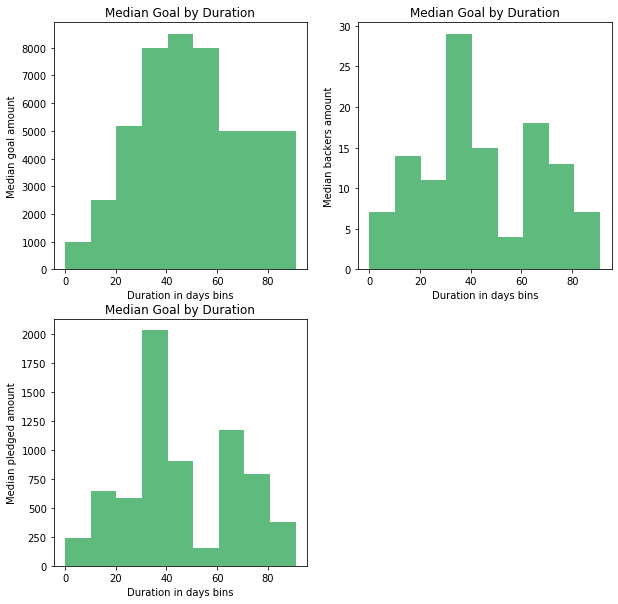

<IPython.core.display.Javascript object>

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.delaxes(ax[1, 1])

# 'Median Goal by Duration'
plot_hist(
    duration_in_days_bins[:-1],
    duration_in_days_bins,
    median_by_duration_bins['usd_goal_real'],
    xlabel='Duration in days bins',
    ylabel='Median goal amount',
    title='Median Goal by Duration',
    ax=ax[0,0]
);

# 'Median Backers Count by Duration'
plot_hist(
    duration_in_days_bins[:-1],
    duration_in_days_bins,
    median_by_duration_bins['backers'],
    xlabel='Duration in days bins',
    ylabel='Median backers amount',
    title='Median Backers by Duration',
    ax=ax[0, 1]
);

# 'Median Pledged Amount by Duration'
plot_hist(
    duration_in_days_bins[:-1],
    duration_in_days_bins,
    median_by_duration_bins['usd_pledged_real'],
    xlabel='Duration in days bins',
    ylabel='Median pledged amount',
    title='Median Pledged Amount by Duration',
    ax=ax[1, 0]
);


**Interpretation:**


_Goal_

Initially, I thought that projects with high amount of goal set will have longer duration for the project to allow more time for the projects to attract backers.
Based on the 'Goal by duration' figure, the highest median goal amount interestingly belongs to projects with duration that ranges from 30-60 days.

_Backers_

The longer the duration of a project, does not necessarily mean that the project will end up attracting more backers, as can be seen in the 'Backers count by duration' histogram. The duration range that attracted the highest number of backers is 30-40 days.

_Pledged_

Again, the highest median pledged amount seen in Kickstarter projects in 2018 belong to the 30-40 duration day range.

## Conclusion

While crowdfunding Kickstarter projects seem lucrative, it does not mean that there is no risk. When a project is failing, the risk extends to both project owners and backers. Project owners who have invested a large amount of money into building the product will suffer from a huge loss if the goal is not met. Backers who have contributed the projects may end up not receiving the products that they expected to get.

In the analysis above, we did a comparison of several success metrics of a project (e.g. number of backers, amount pledged) across different categories & project duration. The aim is to help backers & project owners to be more discerning of the different factors that affect a project success.

Here is the summary of our findings:

_Riskiest Category_

- The riskiest category is 'Technology'. Not only does it require a lot of funds in the first place, but it also has the lowest success rate across all main categories.
- 'Journalism' & 'Crafts' also have low success rates even though the amount of funds required to build the project is relatively low. When these projects failed, the amount of loss tends to be a lot lesser than the loss of Technology projects.
- From the initial analysis, 'Design' seems to be pretty popular among backers and it has the highest median amount pledged. However, the goal that is set for Design projects tends to be high, which makes it more challenging for it to be successful.

_Safest Category_

- The safest category to go for is 'Dance', followed by 'Theater' and 'Comics'.
- These projects do not require a lot of fixed costs to start and have the highest success rates.
- If product owners can reduce the cost associated with Design projects significantly, then it can be a good category to launch your product.

_Ideal Duration_

- Duration does not seem to affect the success of a project much. Setting a longer duration does not necessarily increase the amount pledged and the number of backers.
- Based on the analysis, the ideal duration is around 30–60 days, where it can attract the highest number of backers & generated a good amount of money pledged.